In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('bottle.webp')


In [ ]:
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [ ]:
x,y,w,h = 240,50,290,900
crop = image[y:y+h,x:x+w]

In [ ]:
rows, cols,_ = image.shape
print(rows,cols)

1000 803


In [ ]:
pts1 =np.float32([[50,50],[200,50],[50,200]]) # orignal points
pts2 =np.float32([[10,1],[200,50],[100,250]]) #shifted points

In [ ]:
matrix=cv2.getAffineTransform(pts1,pts2)
affine_image=cv2.warpAffine(image,matrix,(cols,rows))

In [ ]:
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


In [ ]:
c=10/np.log(1+np.max(gray_image))
log_image=c*np.log(1+gray_image.astype(np.float32))
log_image=np.uint8(log_image)

In [ ]:
gamma= 2.6
gamma_corrected=np.power(image/255.0,gamma)*255
gamma_corrected=np.uint8(gamma_corrected)
gamma_value_changed = np.power(image/255.0,gamma + 10)*255
gamma_value_changed=np.uint8(gamma_value_changed)

In [ ]:
negative_image=255-image

In [ ]:
titles = ['original','crop','affine','log','gamma_corrected','negative_image','gamma_value_changed +10']
images = [image,crop,affine_image,log_image,gamma_corrected,negative_image,gamma_value_changed]

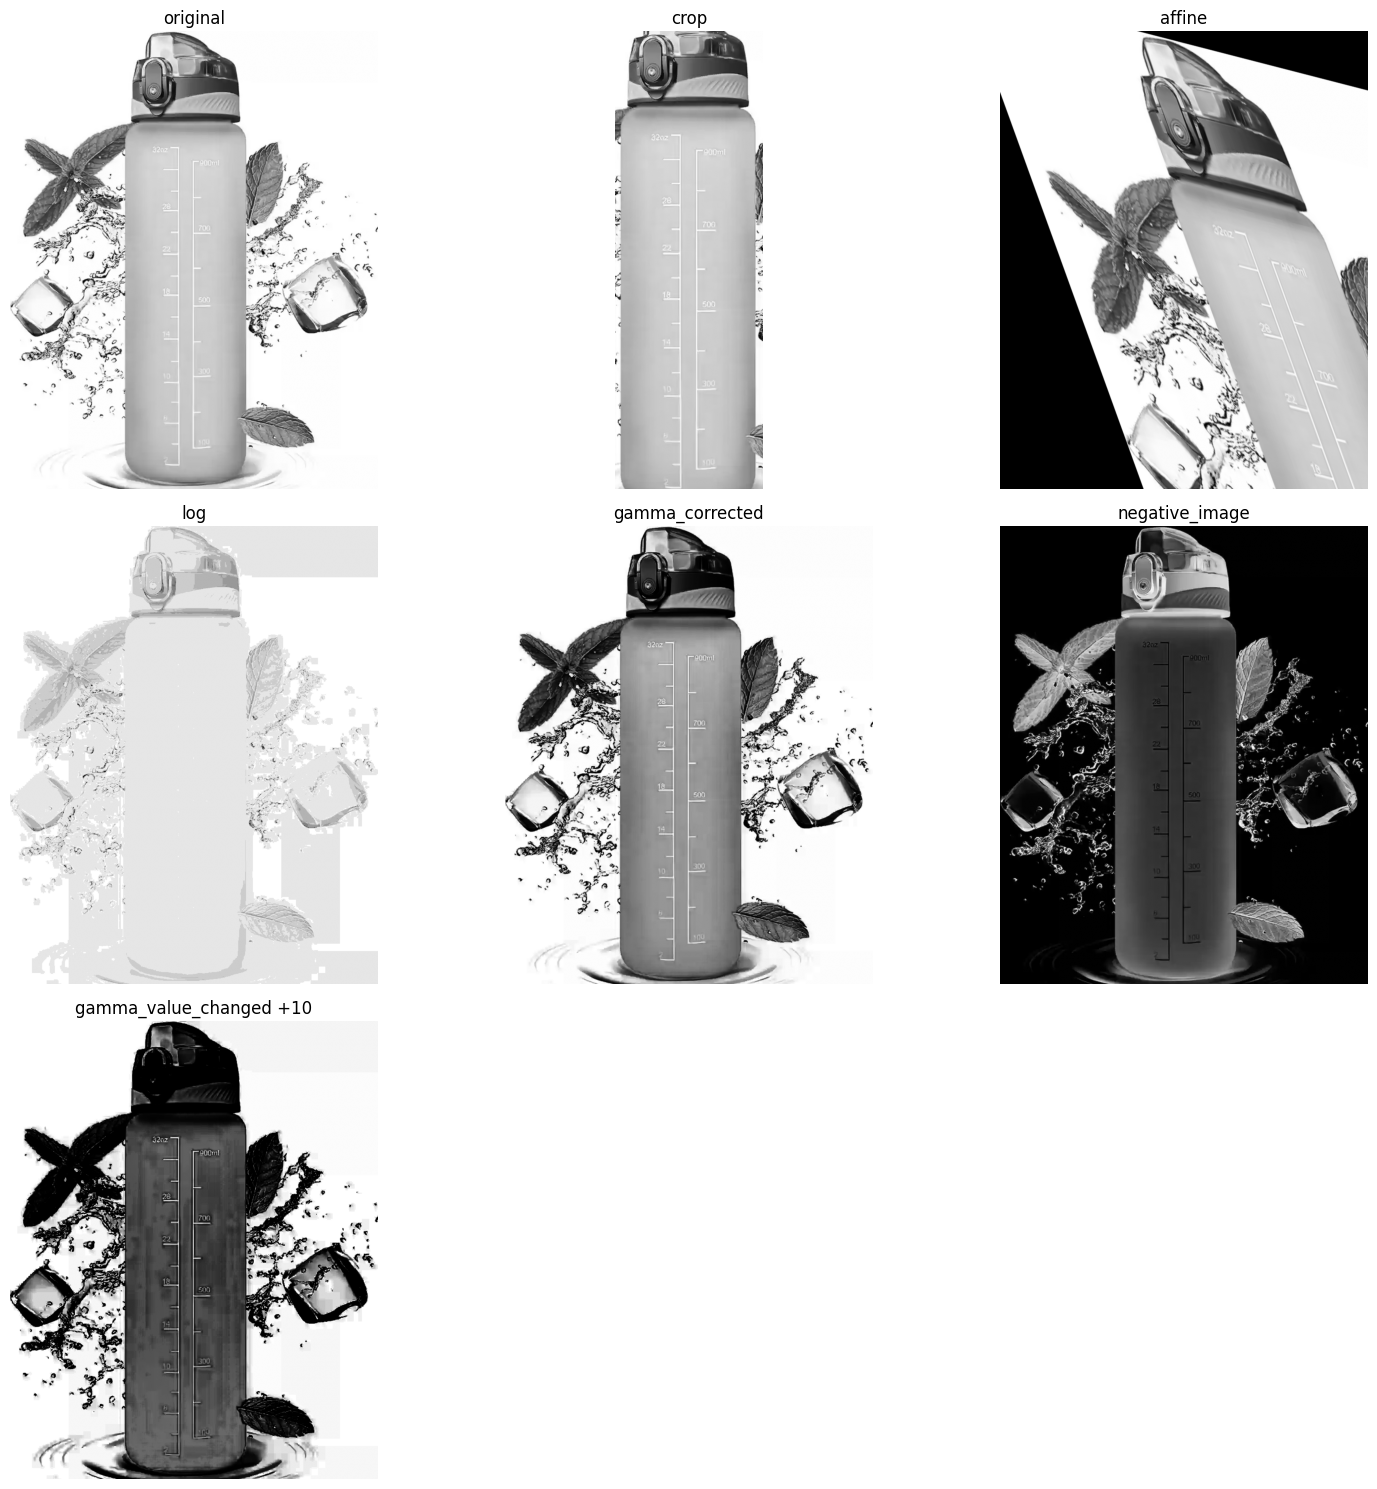

In [ ]:

gray_images = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if len(img.shape) == 3 else img for img in images]
plt.figure(figsize=(15, 15))

for i in range(len(titles)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(gray_images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

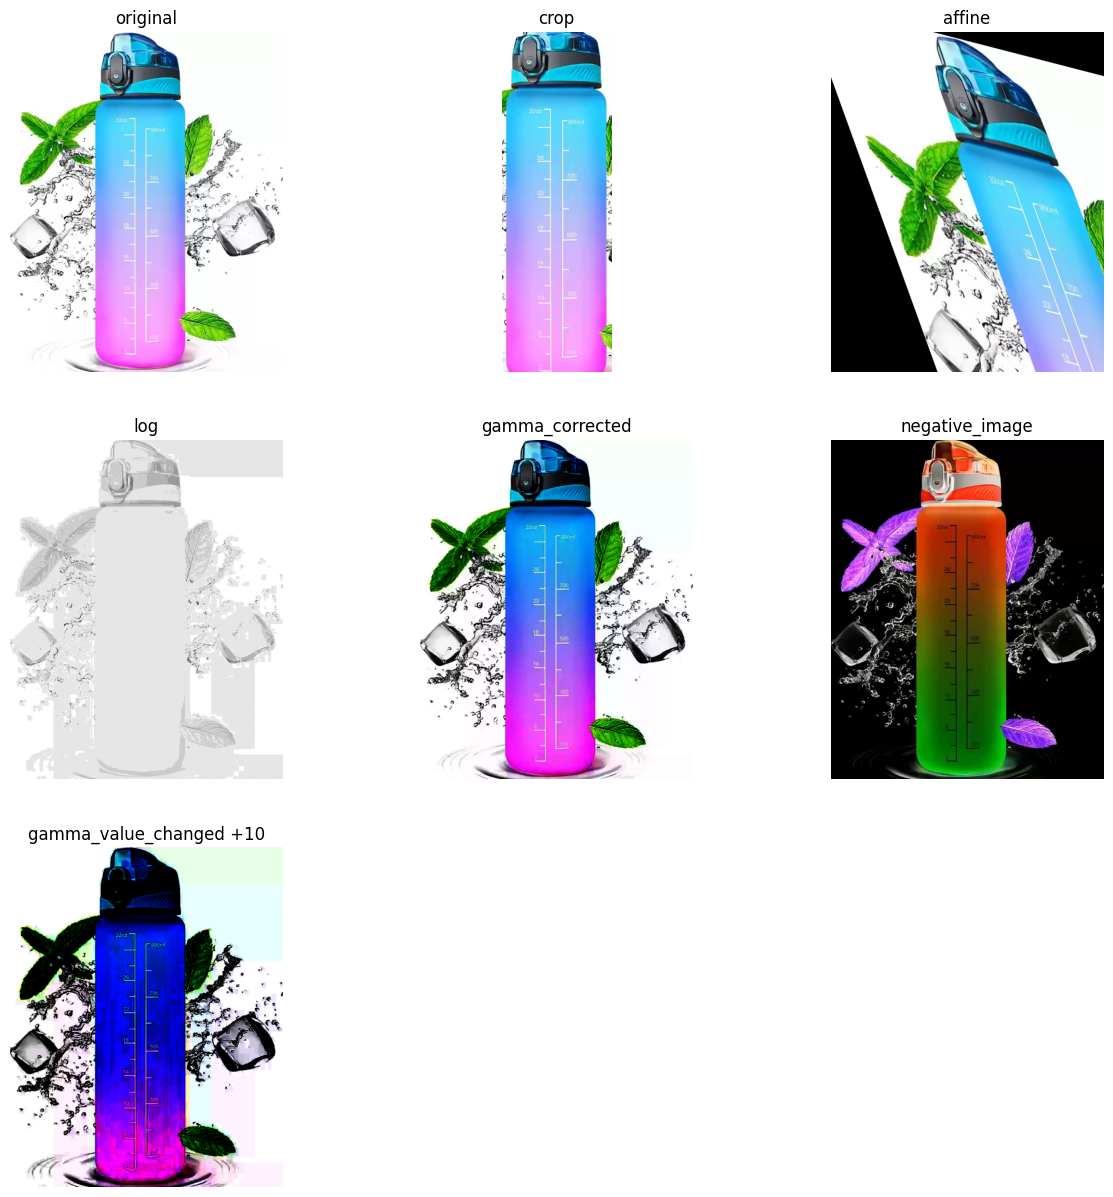

In [ ]:
plt.figure(figsize=(15,15))
for i in range(len((titles))):
  plt.subplot(3,3,i+1)
  plt.imshow(images[i],cmap ='gray')
  plt.title(titles[i])
  plt.axis('off')